In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger

from pondernet import PonderMNIST
from data import MNIST_DataModule, get_transforms
from config import(
    BATCH_SIZE,
    EPOCHS,
    LR,
    GRAD_NORM_CLIP,
    N_HIDDEN,
    N_HIDDEN_CNN,
    N_HIDDEN_LIN,
    KERNEL_SIZE,
    MAX_STEPS,
    LAMBDA_P,
    BETA
)

In [3]:
# train_transform, test_transform = get_transforms()

In [27]:
# mnist = MNIST_DataModule(batch_size=3,
#                             train_transform=train_transform,
#                             test_transform=test_transform)
# mnist.setup(stage='test')
# test_loader = mnist.test_dataloader()

In [30]:
from torchvision import transforms

_transform = lambda degrees: transforms.Compose([
    transforms.RandomRotation(degrees=[degrees]*2),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# degrees = np.linspace(0, 180, 7)
degrees = np.linspace(22.5, 90, 4)
test_transform = np.vectorize(_transform)(degrees)

mnist = MNIST_DataModule(batch_size=3,
                            # train_transform=train_transform,
                            test_transform=test_transform)
mnist.setup(stage='test')
test_loader = mnist.test_dataloader()

In [25]:
rots = degrees
rotlabs = [f"$\;\;\;{r}^\circ$" for r in rots.astype(int)]

In [26]:
for test_images, test_labels in test_loader[0]:  
    sample_image = test_images[0]    # Reshape them according to your needs.
    sample_label = test_labels[0]

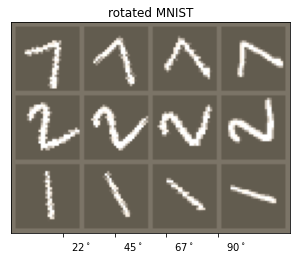

In [27]:
import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(inp)
    # ax.set_xticks(rots)
    # ax.set_xticklabels(rotlabs)
    plt.xticks(rots, labels=rotlabs, ha='left')
    # for tick in ax.get_xticklabels():
    #     tick.set_horizontalalignment("left")
    ax.set_yticks([])
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    return fig


# Get a batch of training data
inputs = []
c1 = []
c2 = []
c3 = []
for loader in test_loader:
    ip, _ = next(iter(loader))
    inputs += ip
    c1.append(ip[0])
    c2.append(ip[1])
    c3.append(ip[2])

# Make a grid from batch
out = torchvision.utils.make_grid(c1+c2+c3, nrow=len(degrees))

fig = imshow(out, "rotated MNIST")
# fig.savefig("rotated_mnist.png", dpi=500)

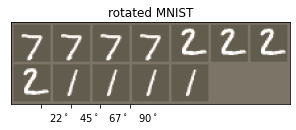

In [129]:
import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(inp)
    # ax.set_xticks(rots)
    # ax.set_xticklabels(rotlabs)
    plt.xticks(rots, labels=rotlabs, ha='left')
    # for tick in ax.get_xticklabels():
    #     tick.set_horizontalalignment("left")
    ax.set_yticks([])
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    return fig


# Get a batch of training data
c1 = []
c2 = []
c3 = []
loader = test_loader[0]
ip, _ = next(iter(loader))
for r in rots:
    torchvision.transforms.functional.rotate
    c1.append(ip[0])
    c2.append(ip[1])
    c3.append(ip[2])

# Make a grid from batch
out = torchvision.utils.make_grid(c1+c2+c3, nrow=7)

fig = imshow(out, "rotated MNIST")
# fig.savefig("rotated_mnist.png", dpi=500)

TypeError: list expected at most 1 argument, got 7

# occluded MNIST

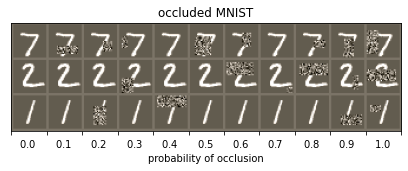

In [115]:
import torch
_transform = lambda p: transforms.Compose([
    transforms.PILToTensor(),
    # transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.RandomErasing(p=p, value='random'),
])

ps = np.linspace(0, 1, 11)
test_transform = np.vectorize(_transform)(ps)

train_transform = test_transform[0]


mnist = MNIST_DataModule(batch_size=3,
                            train_transform=train_transform,
                            test_transform=test_transform)
mnist.setup(stage='test')
test_loader = mnist.test_dataloader()

import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig, ax = plt.subplots(figsize=(7,5))
    ax.imshow(inp)
    ax.set_xticks(np.linspace(0, out.shape[-1], 12))
    ax.set_xticklabels([f"$\;\;\;{p:.2}$" for p in ps] + [""])
    # plt.xticks(ps, ha='left')
    for tick in ax.get_xticklabels():
        tick.set_horizontalalignment("left")
    # ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("probability of occlusion")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    return fig


# Get a batch of training data
c1 = []
c2 = []
c3 = []
for loader in test_loader:
    ip, _ = next(iter(loader))
    c1.append(ip[0])
    c2.append(ip[1])
    c3.append(ip[2])

# Make a grid from batch
out = torchvision.utils.make_grid(c1+c2+c3, nrow=len(ps))

fig = imshow(out, "occluded MNIST")
fig.savefig("occluded_mnist.png", dpi=500)

In [121]:
ps.shape

(10,)

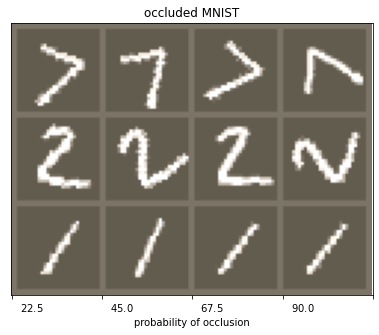

In [137]:
import torch
_transform = lambda p: transforms.Compose([
    transforms.PILToTensor(),
    # transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.RandomAffine(degrees=p),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# ps = np.linspace(0, 1, 11)
ps = rots
test_transform = np.vectorize(_transform)(ps)

train_transform = test_transform[0]


mnist = MNIST_DataModule(batch_size=3,
                            train_transform=train_transform,
                            test_transform=test_transform)
mnist.setup(stage='test')
test_loader = mnist.test_dataloader()

import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig, ax = plt.subplots(figsize=(7,5))
    ax.imshow(inp)
    ax.set_xticks(np.linspace(0, out.shape[-1], len(ps)+1))
    ax.set_xticklabels([f"$\;\;\;{p:.3}$" for p in ps] + [""])
    # plt.xticks(ps, ha='left')
    for tick in ax.get_xticklabels():
        tick.set_horizontalalignment("left")
    # ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("probability of occlusion")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    return fig


# Get a batch of training data
c1 = []
c2 = []
c3 = []
for loader in test_loader:
    ip, _ = next(iter(loader))
    c1.append(ip[0])
    c2.append(ip[1])
    c3.append(ip[2])

# Make a grid from batch
out = torchvision.utils.make_grid(c1+c2+c3, nrow=len(ps))

fig = imshow(out, "occluded MNIST")
# fig.savefig("occluded_mnist.png", dpi=500)

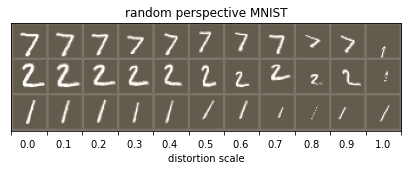

In [179]:
import torch
_transform = lambda p: transforms.Compose([
    transforms.PILToTensor(),
    # transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.RandomPerspective(p, p=1),
    transforms.Normalize((0.1307,), (0.3081,)),
])

ps = np.linspace(0, 1, 11)
# ps = rots
test_transform = np.vectorize(_transform)(ps)

train_transform = test_transform[0]


mnist = MNIST_DataModule(batch_size=3,
                            train_transform=train_transform,
                            test_transform=test_transform)
mnist.setup(stage='test')
test_loader = mnist.test_dataloader()

import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig, ax = plt.subplots(figsize=(7,5))
    ax.imshow(inp)
    ax.set_xticks(np.linspace(0, out.shape[-1], len(ps)+1))
    ax.set_xticklabels([f"$\;\;\;{p:.3}$" for p in ps] + [""])
    # plt.xticks(ps, ha='left')
    for tick in ax.get_xticklabels():
        tick.set_horizontalalignment("left")
    # ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("distortion scale")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    return fig


# Get a batch of training data
c1 = []
c2 = []
c3 = []
for loader in test_loader:
    ip, _ = next(iter(loader))
    c1.append(ip[0])
    c2.append(ip[1])
    c3.append(ip[2])

# Make a grid from batch
out = torchvision.utils.make_grid(c1+c2+c3, nrow=len(ps))

fig = imshow(out, "random perspective MNIST")
fig.savefig("perspective_mnist.png", dpi=500)

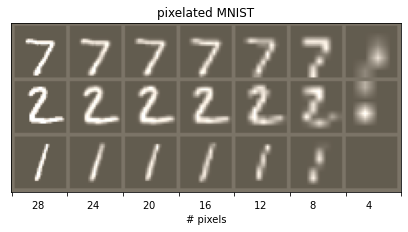

In [180]:
import torch
_transform = lambda p: transforms.Compose([
    transforms.PILToTensor(),
    # transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Resize(p),
    transforms.Resize(28),
    transforms.Normalize((0.1307,), (0.3081,)),
])

ps = np.arange(28, 1, step=-4)
# ps = rots
test_transform = [_transform(int(p)) for p in ps]

train_transform = test_transform[0]


mnist = MNIST_DataModule(batch_size=3,
                            train_transform=train_transform,
                            test_transform=test_transform)
mnist.setup(stage='test')
test_loader = mnist.test_dataloader()

import torchvision

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig, ax = plt.subplots(figsize=(7,5))
    ax.imshow(inp)
    ax.set_xticks(np.linspace(0, out.shape[-1], len(ps)+1))
    ax.set_xticklabels([f"$\quad\quad{p}$" for p in ps] + [""])
    # plt.xticks(ps, ha='left')
    for tick in ax.get_xticklabels():
        tick.set_horizontalalignment("left")
    # ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("# pixels")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    return fig


# Get a batch of training data
c1 = []
c2 = []
c3 = []
for loader in test_loader:
    ip, _ = next(iter(loader))
    c1.append(ip[0])
    c2.append(ip[1])
    c3.append(ip[2])

# Make a grid from batch
out = torchvision.utils.make_grid(c1+c2+c3, nrow=len(ps))

fig = imshow(out, "pixelated MNIST")
fig.savefig("pixelated_mnist.png", dpi=500)

In [167]:
ps

[28, 25, 22, 19, 16, 13]